In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math 
import astropy
import pandas as pd
from scipy.interpolate import interp1d
from scipy.integrate import trapezoid
import matplotlib.colors as col

In [2]:
filter_u = pd.read_csv("/Users/lauragaravito/Downloads/Assignment5/filters/U153.dat", sep="\s+", header=None, skiprows=1, names=["id", "wavelength", "transmission"])
filter_v = pd.read_csv("/Users/lauragaravito/Downloads/Assignment5/filters/V155.dat", sep="\s+", header=None, skiprows=1, names=["id", "wavelength", "transmission"])
filter_b = pd.read_csv("/Users/lauragaravito/Downloads/Assignment5/filters/B154.dat", sep="\s+", header=None, skiprows=1, names=["id", "wavelength", "transmission"])

In [3]:
filter_u

,id,wavelength,transmission
0,1,3050.0,0.000
1,2,3100.0,0.237
2,3,3150.0,0.403
3,4,3200.0,0.489
4,5,3250.0,0.504
5,6,3300.0,0.508
6,7,3350.0,0.511
7,8,3400.0,0.513
8,9,3450.0,0.516
9,10,3500.0,0.528


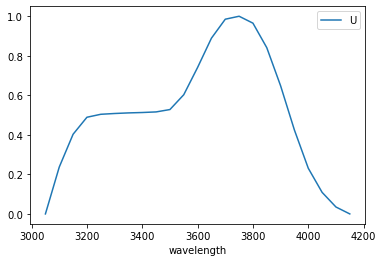

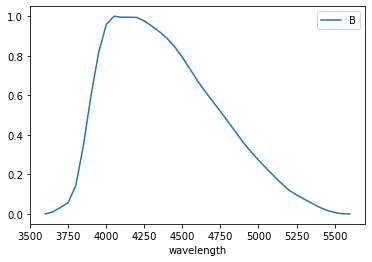

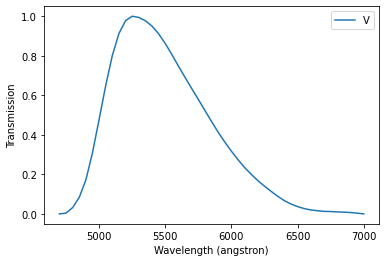

In [4]:
filter_u.plot(x= "wavelength", y = "transmission", label = "U")
filter_b.plot(x= "wavelength", y = "transmission", label = "B")
filter_v.plot(x= "wavelength", y = "transmission", label = "V" )
plt.xlabel("Wavelength (angstron)")
plt.ylabel("Transmission")
plt.show()

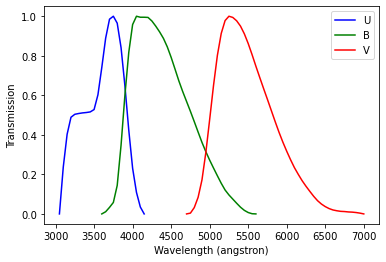

In [5]:
ax = filter_u.plot(x= "wavelength", y = "transmission", label = "U", color = "blue")
filter_b.plot(ax= ax, x= "wavelength", y = "transmission", label = "B", color = "green")
filter_v.plot(ax = ax, x= "wavelength", y = "transmission", label = "V", color = "red")
plt.xlabel("Wavelength (angstron)")
plt.ylabel("Transmission")
plt.show()

Filters Ultraviolet Visible and Blue all graphed on the same plot.

In [6]:
all_stars = pd.read_csv("/Users/lauragaravito/Downloads/Assignment5/templates/pickles_stars/Table.dat", sep="\s+", skiprows= 1, header=None, names=["filename", "spectral_type", "lum_class", "Temperature"])
all_stars

,filename,spectral_type,lum_class,Temperature
0,pickles_uk_1,O5,V,39810.70
1,pickles_uk_2,O9,V,35481.40
2,pickles_uk_3,B0,V,28183.80
3,pickles_uk_4,B1,V,22387.20
4,pickles_uk_5,B3,V,19054.60
...,...,...,...,...
74,pickles_uk_126,G5,I,5046.61
75,pickles_uk_127,G8,I,4591.98
76,pickles_uk_128,K2,I,4255.98
77,pickles_uk_130,K4,I,3990.25


This is the imported table with the information of all the pickles stars

In [9]:
as2 = {'filename': 'wd1', 'spectral_type': 'DA0', 'lum_class': 'WD', "Temperature" : 50400.00}
all_stars = all_stars.append(as2, ignore_index = True)


In [10]:
as2 = {'filename': 'wd2', 'spectral_type': 'DA6', 'lum_class': 'WD', "Temperature" : 8400.00}
all_stars = all_stars.append(as2, ignore_index = True)

In [11]:
all_stars

,filename,spectral_type,lum_class,Temperature
0,pickles_uk_1,O5,V,39810.70
1,pickles_uk_2,O9,V,35481.40
2,pickles_uk_3,B0,V,28183.80
3,pickles_uk_4,B1,V,22387.20
4,pickles_uk_5,B3,V,19054.60
...,...,...,...,...
76,pickles_uk_128,K2,I,4255.98
77,pickles_uk_130,K4,I,3990.25
78,pickles_uk_131,M2,I,3451.44
79,wd1,DA0,WD,50400.00


Now my complete table includes the white dwarfs as well

In [7]:
c = 299792458
c_angstrom = c * 1e10
def wav_2_freq(wavelength):
    return c_angstrom / wavelength

We need to use frequency in order to find absolute and apparent magnitude. I made a function converting the wavelength that is given into frequency. 

In [8]:
inter_u = interp1d(wav_2_freq(filter_u["wavelength"]), filter_u["transmission"], kind= "cubic", bounds_error=False, fill_value=0)
inter_v = interp1d(wav_2_freq(filter_v["wavelength"]), filter_v["transmission"], kind= "cubic", bounds_error=False, fill_value=0)
inter_b = interp1d(wav_2_freq(filter_b["wavelength"]), filter_b["transmission"], kind= "cubic", bounds_error=False, fill_value=0)


The graphs need to be approximated in regards to their frequency and transmission in order to be used in the absolute magnitude function. That line takes the wavelength and turns it into frequency and interpolates it. This makes it exactly the variable that will be used in the absolute magnitude function. 

In [13]:
def AbsoluteMag(interUBV,star):
    nu = star["frequency"]
    f_nu = star["F_Nu"]
    X_nu = interUBV(nu)
    numerator_int = trapezoid(f_nu * X_nu / nu, nu)
    denominator_int = trapezoid( X_nu / nu, nu)
    log_value = numerator_int / denominator_int
    return -2.5 * math.log(log_value,10)-48.6

This is the function for finding the absolute magnitude based on the U B or V filter and of the star chosen. 

In [14]:
for i, row in all_stars.iterrows():
    filename = row["filename"]
    p_stars = pd.read_csv(f"/Users/lauragaravito/Downloads/Assignment5/templates/pickles_stars/ascii_norm/{filename}.ascii",sep="\s+", skiprows=3, header=None, names=["wavelength", "F_Lambda"]) 
    # p_stars = dv
    p_stars["frequency"] = wav_2_freq(p_stars["wavelength"])
    p_stars["F_Nu"] = p_stars["F_Lambda"] * p_stars["wavelength"] ** 2 / c_angstrom
    all_stars.loc[i,"MV"] = AbsoluteMag(inter_v , p_stars)
    all_stars.loc[i,"MU"] = AbsoluteMag(inter_u , p_stars)
    all_stars.loc[i,"MB"] = AbsoluteMag(inter_b , p_stars)
    all_stars.loc[i, "U-B"] = all_stars.loc[i, "MU"] -all_stars.loc[i, "MB"]
    all_stars.loc[i, "B-V"] = all_stars.loc[i, "MB"] -all_stars.loc[i, "MV"]


In this code I completed each table of stars adding the correct frequency we want to use in the absolute magnitude function. I also ran through all the pickles star files, applied my absolute magnitude function, and added it to the table

In [15]:
p_stars

,wavelength,F_Lambda,frequency,F_Nu
0,3200.0,-5.206416e-18,9.368514e+14,-1.778354e-29
1,3202.0,-8.217942e-18,9.362663e+14,-2.810509e-29
2,3204.0,3.339943e-17,9.356818e+14,1.143677e-28
3,3206.0,-1.579246e-17,9.350981e+14,-5.414472e-29
4,3208.0,4.796911e-17,9.345151e+14,1.646682e-28
...,...,...,...,...
3204,9608.0,2.549021e-15,3.120238e+14,7.849079e-26
3205,9610.0,2.978946e-15,3.119589e+14,9.176746e-26
3206,9612.0,2.091717e-15,3.118939e+14,6.446289e-26
3207,9614.0,1.978907e-15,3.118291e+14,6.101167e-26


This is what the new table for each star looks like

In [16]:
all_stars

,filename,spectral_type,lum_class,Temperature,MV,MU,MB,U-B,B-V
0,pickles_uk_1,O5,V,39810.70,-5.400073,-6.212510,-5.893420,-0.319089,-0.493348
1,pickles_uk_2,O9,V,35481.40,-4.000110,-4.717033,-4.444463,-0.272570,-0.444353
2,pickles_uk_3,B0,V,28183.80,-3.700075,-4.352435,-4.155024,-0.197410,-0.454950
3,pickles_uk_4,B1,V,22387.20,-3.200017,-3.663472,-3.556467,-0.107006,-0.356450
4,pickles_uk_5,B3,V,19054.60,-2.100071,-2.274122,-2.413165,0.139042,-0.313093
...,...,...,...,...,...,...,...,...,...
76,pickles_uk_128,K2,I,4255.98,-6.099978,-2.216451,-4.693201,2.476750,1.406777
77,pickles_uk_130,K4,I,3990.25,-6.199980,-2.074897,-4.634224,2.559327,1.565756
78,pickles_uk_131,M2,I,3451.44,-6.300033,-2.007617,-4.668836,2.661220,1.631197
79,wd1,DA0,WD,50400.00,10.799826,10.463483,10.368154,0.095330,-0.431673


This is the completed table with all necessary values for every star.

HR DIAGRAM

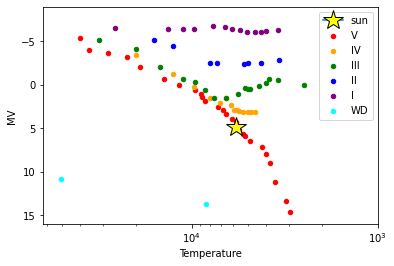

In [17]:
ax = None
colors = ["red", "orange", "green", "blue", "purple", "cyan"]

for i, lumclass in enumerate(all_stars["lum_class"].unique()):
    hr_points = all_stars[all_stars["lum_class"] == lumclass]
    ax = hr_points.plot(x="Temperature", y = "MV", ax=ax, kind = "scatter", xlim=(10**4.8,10**3),ylim=(16,-9), logx = True, color=colors[i], label=lumclass)
sun_x = [5778]
sun_y = [4.80]
plt.plot(sun_x, sun_y, marker="*", markersize=21, markeredgecolor="black", markerfacecolor="yellow", label = "sun")
ax.legend()
plt.show()



This is the HR diagram. Color coded by Luminosity Class. It shows temperature on a Log scale on the X axis and Mv on the y axis. The sun is plotted on top for reference

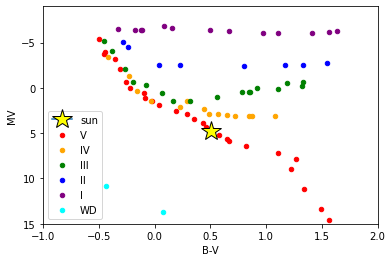

In [18]:
ax = None
colors = ["red", "orange", "green", "blue", "purple",  "cyan"]

for i, lumclass in enumerate(all_stars["lum_class"].unique()):
    hr_points = all_stars[all_stars["lum_class"] == lumclass]
    ax = hr_points.plot(x="B-V", y = "MV", ax=ax, kind = "scatter", xlim=(-1,2),ylim=(15,-9), color=colors[i], label=lumclass)
sun_x = [0.51]
sun_y = [4.80]
plt.plot(sun_x, sun_y, marker="*", markersize=21, markeredgecolor="black", markerfacecolor="yellow", label = "sun")
ax.legend()
plt.show()

This is color coded by Luminosity Class. It shows the B filter magnitude minus V on the x axis and Mv on the y axis

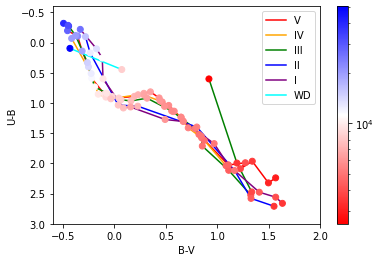

In [31]:
ax = None
colors = ["red", "orange", "green", "blue", "purple",  "cyan"]

for i, lumclass in enumerate(all_stars["lum_class"].unique()):
    hr_points = all_stars[all_stars["lum_class"] == lumclass]
    ax = hr_points.plot(x="B-V", y = "U-B", ax=ax, kind = "line", xlim=(-.6,2),ylim=(3,-.6), color=colors[i], label=lumclass, zorder=1)
    
sc = ax.scatter(all_stars["B-V"], all_stars["U-B"], c=all_stars["Temperature"], cmap="bwr_r", norm=col.LogNorm(), zorder = 2)

ax.legend()

cor = plt.colorbar(sc)
plt.ylabel("U-B")
plt.show()

This is color coded by Luminosity Class in lines connecting the dots, and a temperature gradient. It shows the B filter magnitude minus V on the x axis and U minus B on the y axis

In [20]:
h = 6.6260688 * 10**-27
c = 2.99792448 * 10 **10
k = 1.38064852 * 10 ** -16

In [21]:
def black_body_F_nu(temp,nu):
    first_term = (2 * math.pi * h * nu**3)/(c**2)
    second_term = 1/(math.e ** ((h * nu) / (k * temp)) -1)
    return first_term * second_term

In [22]:
def AbsoluteMag_blackbody(interUBV,temperature):
    nu = interUBV.x
    f_nu = black_body_F_nu(temperature,nu)
    X_nu = interUBV(nu)
    numerator_int = trapezoid(f_nu * X_nu / nu, nu)
    denominator_int = trapezoid( X_nu / nu, nu)
    log_value = numerator_int / denominator_int
    return -2.5 * math.log(log_value,10)-48.6

In [23]:
AbsoluteMag_blackbody_u = np.vectorize(lambda T: AbsoluteMag_blackbody(inter_u, T))
AbsoluteMag_blackbody_b = np.vectorize(lambda T: AbsoluteMag_blackbody(inter_b, T))
AbsoluteMag_blackbody_v = np.vectorize(lambda T: AbsoluteMag_blackbody(inter_v, T))
TempRange = np.logspace(np.log10(2200),np.log10(100000), 50)

In [24]:
bb_bv = AbsoluteMag_blackbody_b(TempRange)-AbsoluteMag_blackbody_v(TempRange)
bb_ub = AbsoluteMag_blackbody_u(TempRange)-AbsoluteMag_blackbody_b(TempRange)

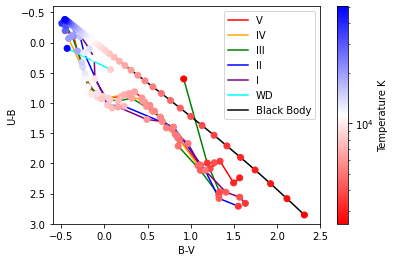

In [27]:
ax = None
colors = ["red", "orange", "green", "blue", "purple",  "cyan"]

for i, lumclass in enumerate(all_stars["lum_class"].unique()):
    hr_points = all_stars[all_stars["lum_class"] == lumclass]
    ax = hr_points.plot(x="B-V", y = "U-B", ax=ax, kind = "line", xlim=(-.6,2.5),ylim=(3,-.6), color=colors[i], label=lumclass, zorder=1)
    
sc = ax.scatter(all_stars["B-V"], all_stars["U-B"], c=all_stars["Temperature"], cmap="bwr_r", norm=col.LogNorm(), zorder = 2)


ax.plot(bb_bv,bb_ub, zorder=3, c="black", label = "Black Body")
ax.scatter(bb_bv,bb_ub, c=(TempRange), cmap="bwr_r", norm=col.LogNorm(), zorder=4)
ax.legend()
cor = plt.colorbar(sc)

cor.set_label('Temperature K', rotation=90)
plt.ylabel("U-B")
plt.show()

In [ ]:
This is the same graph as shown above, but with an ideal blackbody star plotted above. 

 Do you notice any trend? Describe and discuss your findings.
 The blackbody does look like an ideal star. It follows a constant slope and constant temperature change. It goes along with what the trendline for the others stars' luminosity class trendlines would look like. 

# VEGA

In [28]:
def apparent_magnitude_vega(distance):
    Mv=0.6
    add = 5 * np.log10(distance)
    return Mv + add - 5

In [29]:
distrange = np.logspace(np.log10(4e-6),np.log10(10e6), 50)

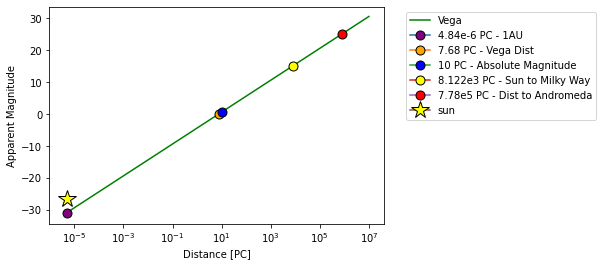

In [30]:
plt.plot(distrange,apparent_magnitude_vega(distrange), c="green", label="Vega")
plt.xscale("log")
plt.xlabel("Distance [PC]")
plt.ylabel("Apparent Magnitude") 
plt.plot(4.84e-6,apparent_magnitude_vega(4.84e-6), marker=".", markersize=18, markeredgecolor="black", markerfacecolor="purple", label = "4.84e-6 PC - 1AU")
plt.plot(7.68,apparent_magnitude_vega(7.68), marker=".", markersize=18, markeredgecolor="black", markerfacecolor="orange", label = "7.68 PC - Vega Dist")
plt.plot(10,apparent_magnitude_vega(10), marker=".", markersize=18, markeredgecolor="black", markerfacecolor="blue", label = "10 PC - Absolute Magnitude")
plt.plot(8.122e3,apparent_magnitude_vega(8.122e3), marker=".", markersize=18, markeredgecolor="black", markerfacecolor="yellow", label = "8.122e3 PC - Sun to Milky Way")
plt.plot(7.78e5,apparent_magnitude_vega(7.78e5), marker=".", markersize=18, markeredgecolor="black", markerfacecolor="red", label = "7.78e5 PC - Dist to Andromeda")
plt.plot(4.84e-6,-26.74, marker="*", markersize=18, markeredgecolor="black", markerfacecolor="yellow", label = "sun")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()